In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('youth_tobacco_survey_yts_data.csv')

In [3]:
df

,year,locationabbr,locationdesc,topictype,topicdesc,measuredesc,datasource,response,data_value_unit,data_value_type,...,geolocation,topictypeid,topicid,measureid,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,displayorder
0,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,1GEN,8AGE,6RAC,1EDU,YTS01,1
1,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,2GEN,8AGE,6RAC,1EDU,YTS02,2
2,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3
3,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
4,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,2GEN,8AGE,6RAC,1EDU,YTS05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
9790,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
9791,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS12,12
9792,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,3GEN,8AGE,6RAC,1EDU,YTS12,12


In [4]:
df.shape

(9794, 31)

In [5]:
df.isnull().sum()

year                             0
locationabbr                     0
locationdesc                     0
topictype                        0
topicdesc                        0
measuredesc                      0
datasource                       0
response                      2246
data_value_unit                  0
data_value_type                  0
data_value                     425
data_value_footnote_symbol    9369
data_value_footnote           9369
data_value_std_err             425
low_confidence_limit           425
high_confidence_limit          425
sample_size                    425
gender                           0
race                             0
age                              0
education                        0
geolocation                      4
topictypeid                      0
topicid                          0
measureid                        0
stratificationid1                0
stratificationid2                0
stratificationid3                0
stratificationid4   

In [6]:
# Drop columns with high missing values that are not relevant
df.drop(['data_value_footnote_symbol', 'data_value_footnote'], axis=1, inplace=True)

In [7]:
# Drop rows where 'response' (our target variable) is missing
# Because the KNN algorithm requires complete data for both features and target labels

df.dropna(subset=['response'], inplace=True)

In [8]:
df.isnull().sum()

year                     0
locationabbr             0
locationdesc             0
topictype                0
topicdesc                0
measuredesc              0
datasource               0
response                 0
data_value_unit          0
data_value_type          0
data_value               0
data_value_std_err       0
low_confidence_limit     0
high_confidence_limit    0
sample_size              0
gender                   0
race                     0
age                      0
education                0
geolocation              0
topictypeid              0
topicid                  0
measureid                0
stratificationid1        0
stratificationid2        0
stratificationid3        0
stratificationid4        0
submeasureid             0
displayorder             0
dtype: int64

In [9]:
df.dtypes

year                       int64
locationabbr              object
locationdesc              object
topictype                 object
topicdesc                 object
measuredesc               object
datasource                object
response                  object
data_value_unit           object
data_value_type           object
data_value               float64
data_value_std_err       float64
low_confidence_limit     float64
high_confidence_limit    float64
sample_size              float64
gender                    object
race                      object
age                       object
education                 object
geolocation               object
topictypeid               object
topicid                   object
measureid                 object
stratificationid1         object
stratificationid2         object
stratificationid3         object
stratificationid4         object
submeasureid              object
displayorder               int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables (gender, locationabbr, response)
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_location = LabelEncoder()
df['locationabbr'] = le_location.fit_transform(df['locationabbr'])

In [11]:
df['response'].unique()

array(['Current', 'Ever', 'Frequent'], dtype=object)

In [12]:
df['response']=df['response'].map({ 'Current':0,'Ever':1,'Frequent':2})

In [13]:
# drop null values
df.dropna(inplace=True)

In [14]:
X = df[['gender', 'locationabbr', 'data_value']]
y = df['response']

In [15]:
X

,gender,locationabbr,data_value
6,2,2,3.2
7,1,2,3.2
8,0,2,3.1
9,2,2,12.5
10,1,2,12.9
...,...,...,...
9789,2,40,1.1
9790,1,40,7.7
9791,1,40,1.9
9792,0,40,0.2


In [16]:
y

6       0
7       0
8       0
9       1
10      1
       ..
9789    2
9790    2
9791    2
9792    2
9793    2
Name: response, Length: 7548, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

param_grid = {
    'min_samples_leaf': [2, 3, 4],
    'max_depth': [3, 4, 5],
    'criterion': ['gini', 'entropy']
}

In [19]:
from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier()

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=2, max_depth=3, criterion="entropy")

#grid_search = GridSearchCV(clf, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

In [20]:
#best_params = grid_search.best_params_
#print("Best parameters found:", best_params)
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [21]:
#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(X_test)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [22]:
y_pred

array([2, 0, 2, ..., 0, 0, 2], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.85%


In [24]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.52      0.49       613
           1       0.71      0.66      0.69       633
           2       0.74      0.70      0.72       641

    accuracy                           0.63      1887
   macro avg       0.64      0.63      0.63      1887
weighted avg       0.64      0.63      0.63      1887



In [25]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[317 151 145]
 [203 418  12]
 [174  16 451]]


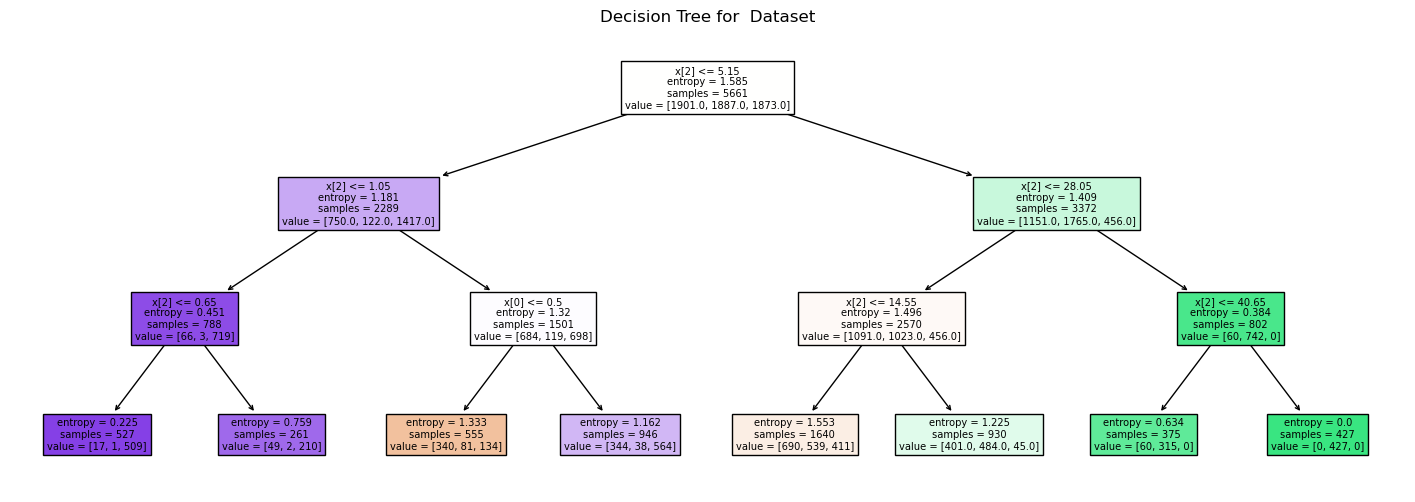

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(18, 6))
tree.plot_tree(clf, filled=True)
plt.title("Decision Tree for  Dataset")
plt.show()

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Support Vector Machines (SVMs) 

In [29]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.svm import SVC

# Initialize the SVM model with the RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

In [31]:
# Train the model
svm_rbf.fit(X_train_scaled, y_train)

SVC()

In [32]:
# Make predictions on the test set
y_pred = svm_rbf.predict(X_test_scaled)

In [33]:
y_pred 

array([2, 1, 2, ..., 1, 2, 0], dtype=int64)

In [34]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.85%


In [35]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.37      0.41       490
           1       0.70      0.72      0.71       508
           2       0.67      0.79      0.73       512

    accuracy                           0.63      1510
   macro avg       0.61      0.62      0.62      1510
weighted avg       0.61      0.63      0.62      1510



In [36]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[180 132 178]
 [126 365  17]
 [ 81  27 404]]


 Hyperparameter Tuning with GridSearchCV

In [38]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Initialize GridSearchCV with SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']})

In [40]:
# Get the best parameters and accuracy
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [41]:
# Get the best parameters and accuracy
best_score = grid_search.best_score_
print("Best cross-validation accuracy:", best_score)

Best cross-validation accuracy: 0.6523690448103503


In [42]:
# Train the SVM model again using the best parameters
svm_rbf_best = SVC(**best_params)
svm_rbf_best.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1)

In [43]:
# Make predictions with the best model
y_pred_best = svm_rbf_best.predict(X_test_scaled)

In [44]:
y_pred_best

array([2, 1, 2, ..., 1, 2, 0], dtype=int64)

In [45]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)

Accuracy with best parameters: 0.6847682119205298


In [46]:
print("Classification Report with best parameters:\n", 
      classification_report(y_test, y_pred_best))

Classification Report with best parameters:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56       490
           1       0.70      0.78      0.74       508
           2       0.82      0.70      0.75       512

    accuracy                           0.68      1510
   macro avg       0.69      0.68      0.68      1510
weighted avg       0.69      0.68      0.69      1510

